In [57]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import ast
import os
import sys
import pandas as pd

from pathlib import Path

lib_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'lib'))
print("Lib path:", lib_path)

# Append the absolute path to sys.path
sys.path.append(lib_path)


# Import SGD utils
from SGD_utils import *

Lib path: /Users/guime/projects/SLTforSGD/code/lib


In [58]:
# Plotting settings
plt.style.use('ggplot')
fig_width = 25  # figure width in cm
inches_per_cm = 0.393701               # Convert cm to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width*inches_per_cm  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]
label_size = 14
tick_size = 12
params = {'backend': 'ps',
          'lines.linewidth': 1.5,
          'axes.labelsize': label_size,
          'axes.titlesize': label_size,
          'font.size': label_size,
          'legend.fontsize': tick_size,
          'xtick.labelsize': tick_size,
          'ytick.labelsize': tick_size,
          'text.usetex': False,
          'figure.figsize': fig_size,
          "font.weight": "bold",
          "axes.labelweight": "bold"}
plt.rcParams.update(params)

# Influence of sharpness

In [59]:
# Initialise
nSGD = 10**4
nsamples = 5*10**2
shuffle = True
batch_size= 10
w0 = 1.8
seed_init = 1
seed_data = 1
wmax = 2*w0
frac_max = 10**-3
model = PolyModel(w0=w0, seed=seed_init, wmax=wmax, wmin=-wmax)
sgd_runner = SGDPolyRunner(nSGD=nSGD, nsamples=nsamples, seed=seed_data, shuffle=shuffle, 
                           batch_size=batch_size, auto=True)
# Run parameter sweep
w0_range = np.arange(1.6, 1.95, 0.025)
batch_range = [25]
lr_range = [0.01]
df = sgd_runner.parameter_sweep(w0_range, batch_range, lr_range, 
                        model, frac_max=frac_max)

Running experiment 0 over 14


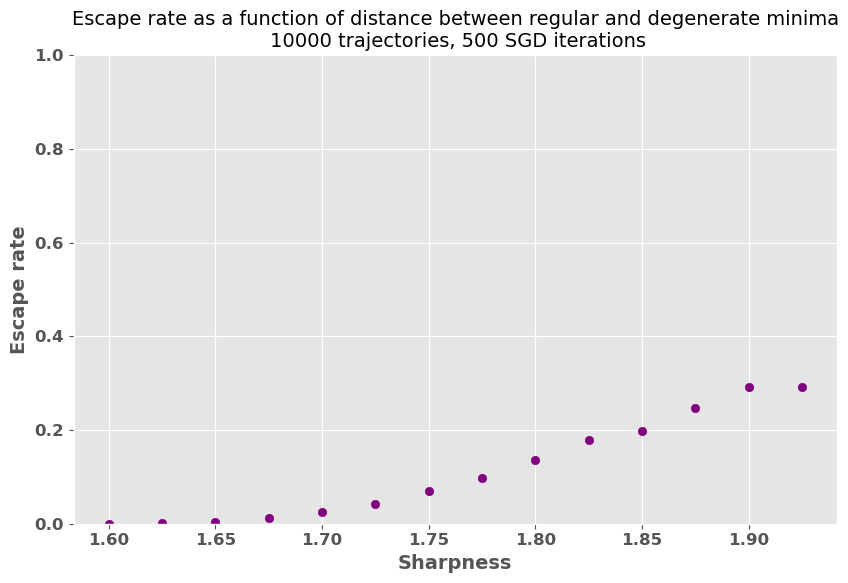

In [ ]:
%matplotlib inline
from scipy.interpolate import griddata
import matplotlib
cleaned_df = df.copy().dropna()
x = cleaned_df['w0']
y = cleaned_df['escape_rate']
nexp = len(cleaned_df)
# Create the scatter plot
plt.scatter(x, y, c="purple")
# Adding a colorbar to show the values of escape_rate
# Adding labels and title
plt.xlabel('Sharpness')
plt.ylabel('Escape rate')
plt.yscale('linear')
plt.xscale('linear')
plt.title(f'Escape rate as a function of distance between regular and degenerate minima\n {nSGD} trajectories, {nsamples/batch_size} SGD iterations')
plt.ylim(0, 1)
plt.show()

# Influence of Learning rate

Running experiment 0 over 9


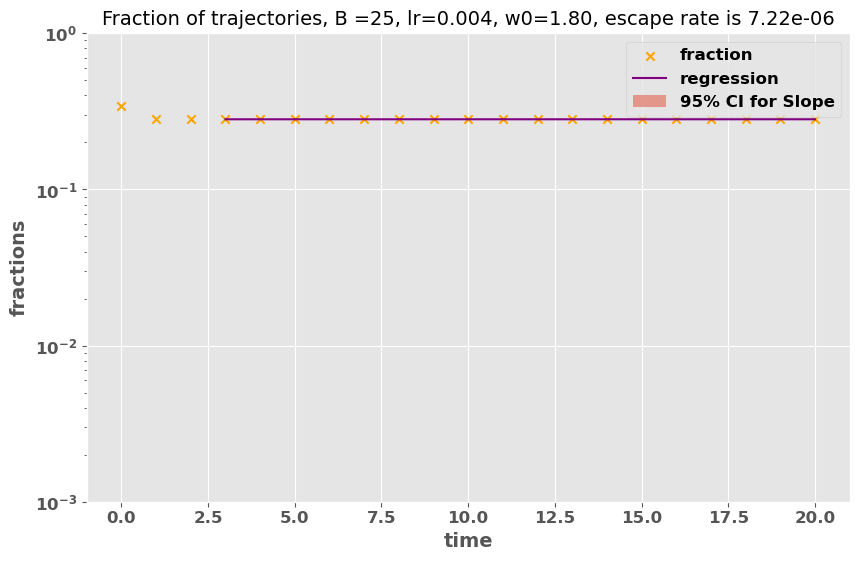

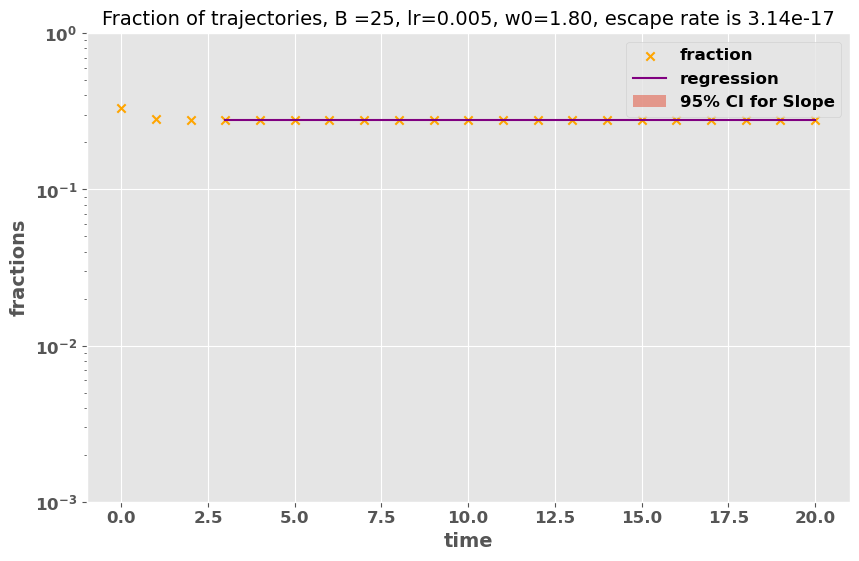

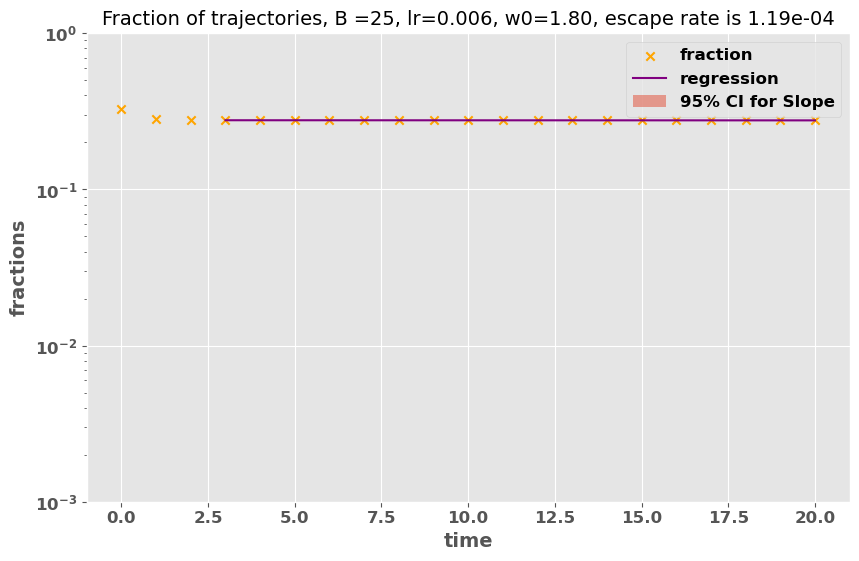

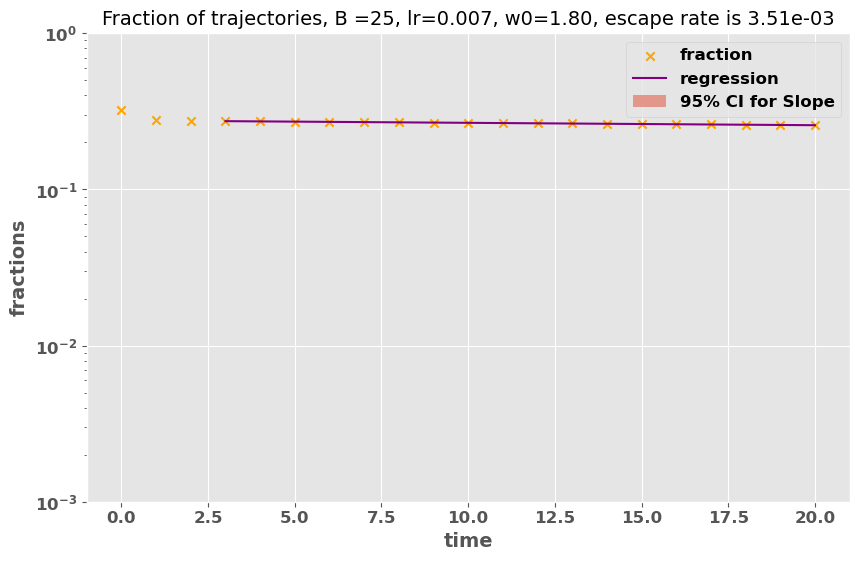

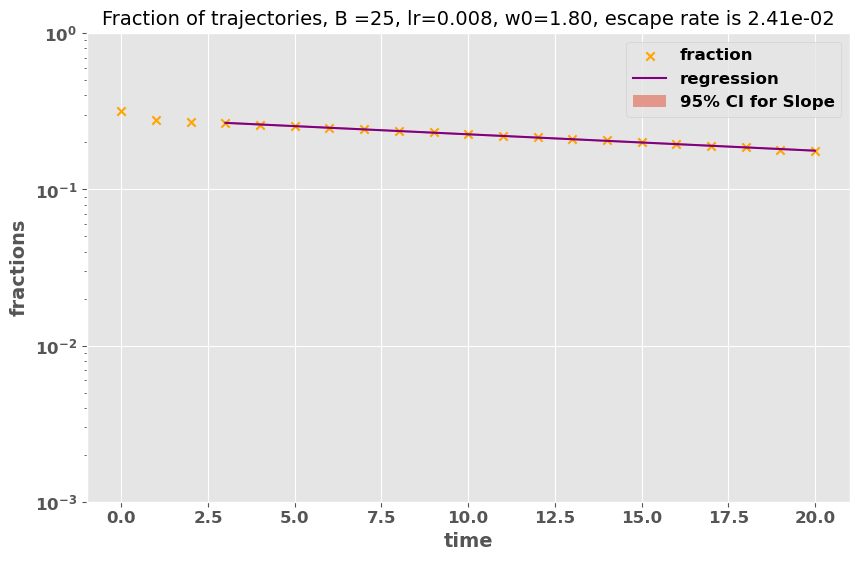

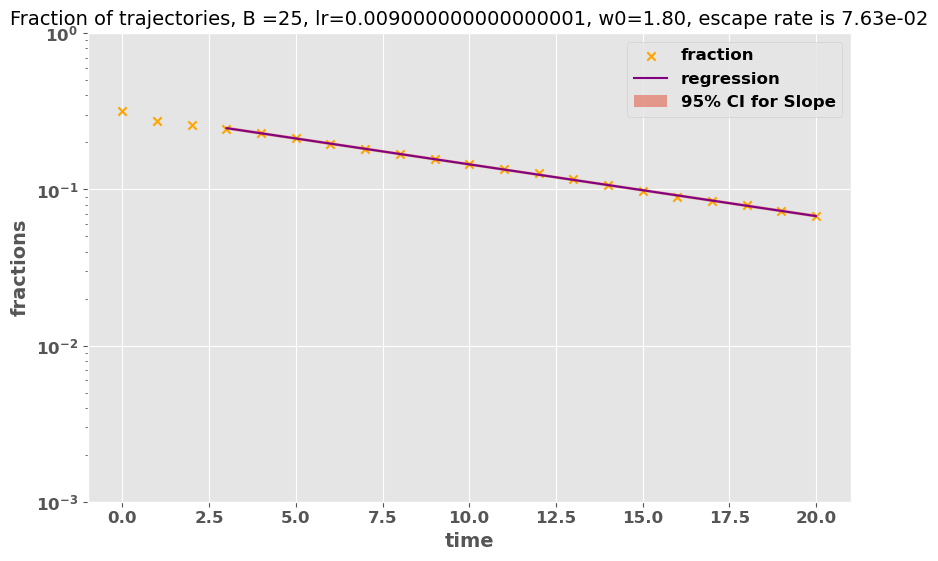

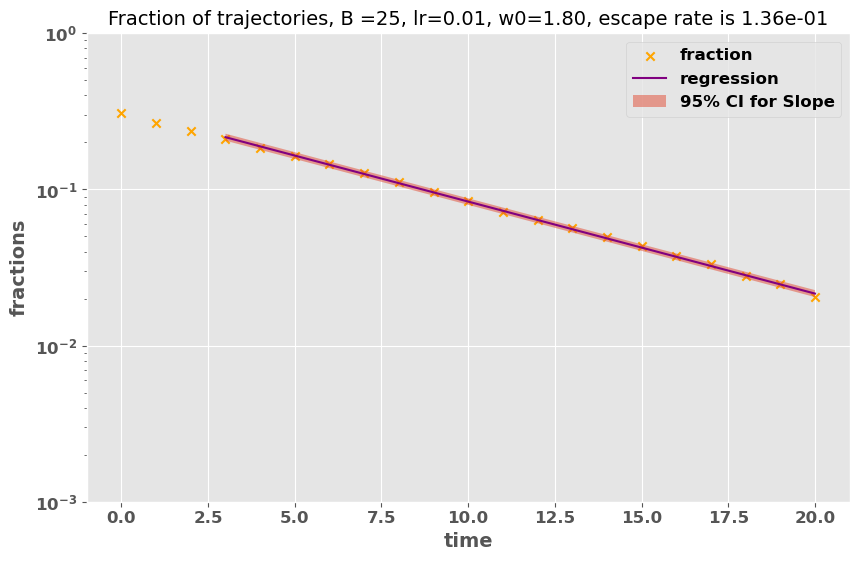

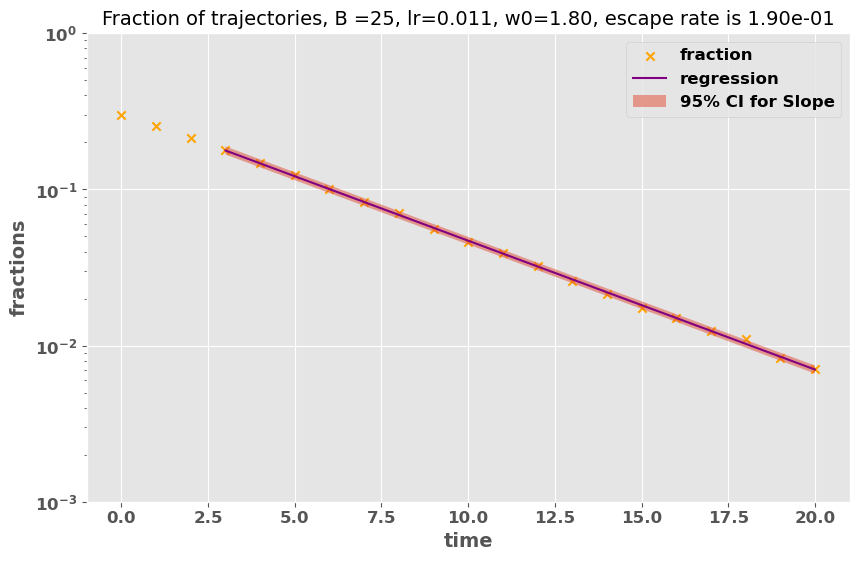

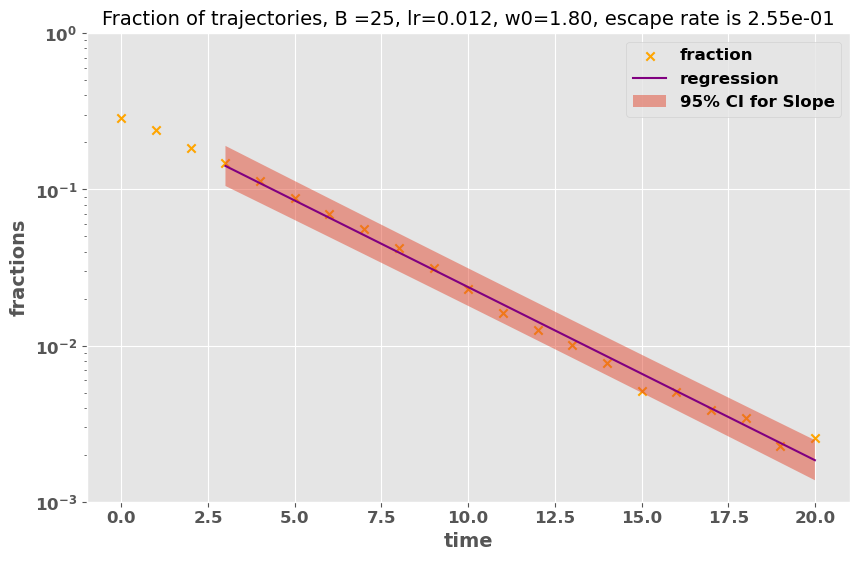

In [ ]:
# Initialise
nSGD = 10**4
nsamples = 5*10**2
shuffle = True
seed_init = 1
seed_data = 1
wmax = 4
frac_max = 10**-3
model = PolyModel(w0=w0, seed=seed_init, wmax=wmax, wmin=-wmax)
sgd_runner = SGDPolyRunner(nSGD=nSGD, nsamples=nsamples, seed=seed_data, shuffle=shuffle, 
                           batch_size=batch_size, auto=True)
# Run parameter sweep
w0_range = [1.8]
batch_range = [25]
lr_range = np.arange(0.004, 0.013, 0.001)
df = sgd_runner.parameter_sweep(w0_range, batch_range, lr_range, 
                        model, frac_max=frac_max)

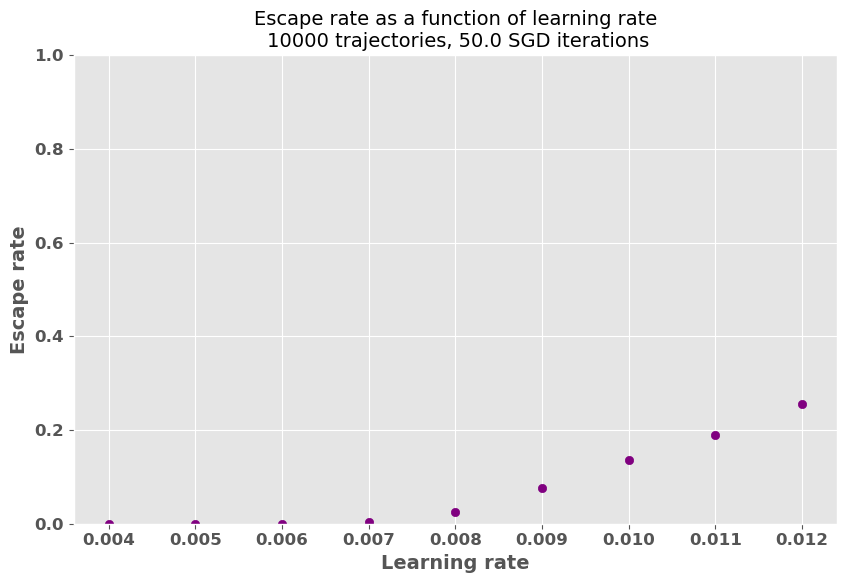

In [ ]:
%matplotlib inline
from scipy.interpolate import griddata
import matplotlib
cleaned_df = df.copy().dropna()
x = cleaned_df['lr']
y = cleaned_df['escape_rate']
nexp = len(cleaned_df)
# Create the scatter plot
plt.scatter(x, y, c="purple")
# Adding a colorbar to show the values of escape_rate
# Adding labels and title
plt.xlabel('Learning rate')
plt.ylabel('Escape rate')
plt.yscale('linear')
plt.xscale('linear')
plt.title(f'Escape rate as a function of learning rate\n {nSGD} trajectories, {nsamples/batch_size} SGD iterations')
plt.ylim(0, 1)
plt.show()

# Influence of batch size

Running experiment 0 over 12


/Users/guime/projects/SLTforSGD/code/lib/SGD_utils.py:469: RuntimeWarning: divide by zero encountered in log
  log_frac = np.log(fraction)


Running experiment 10 over 12


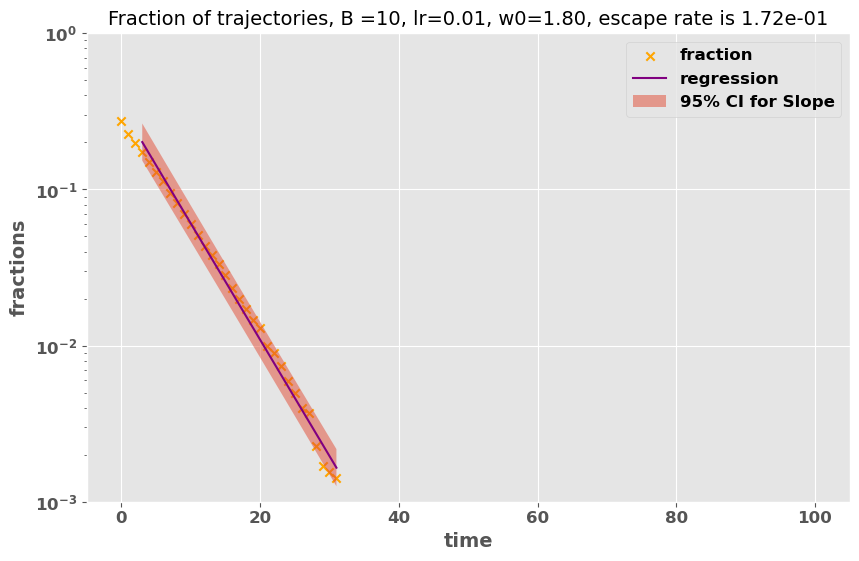

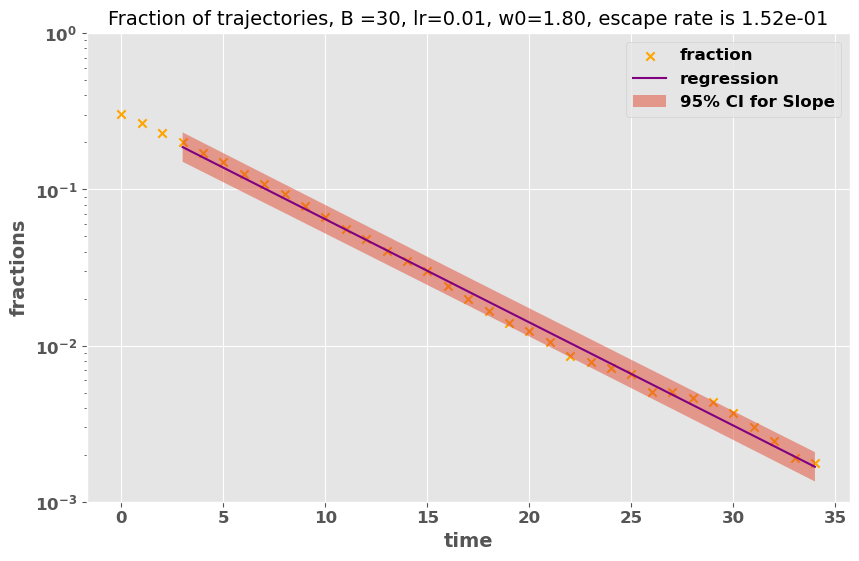

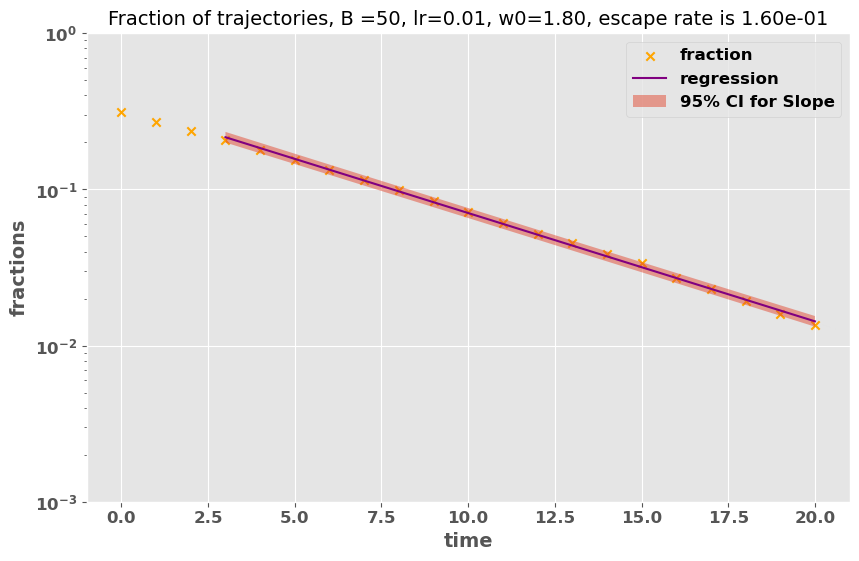

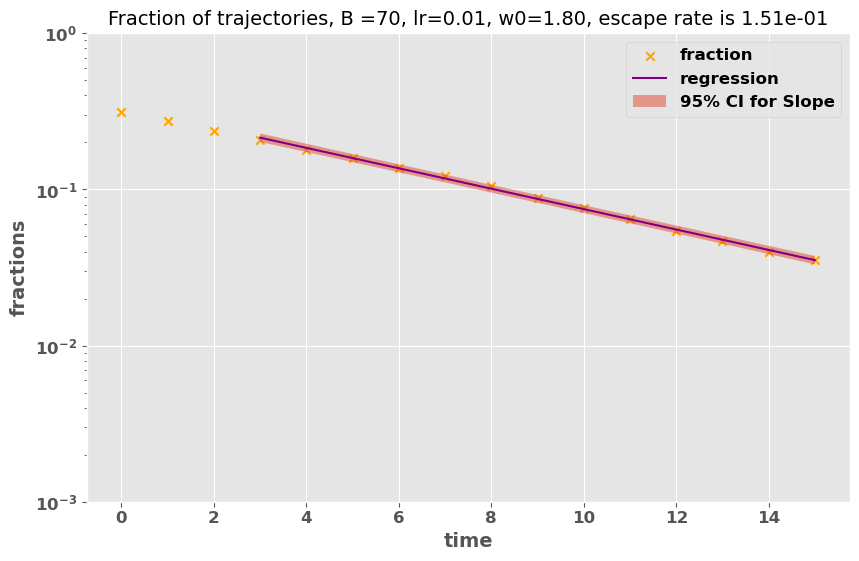

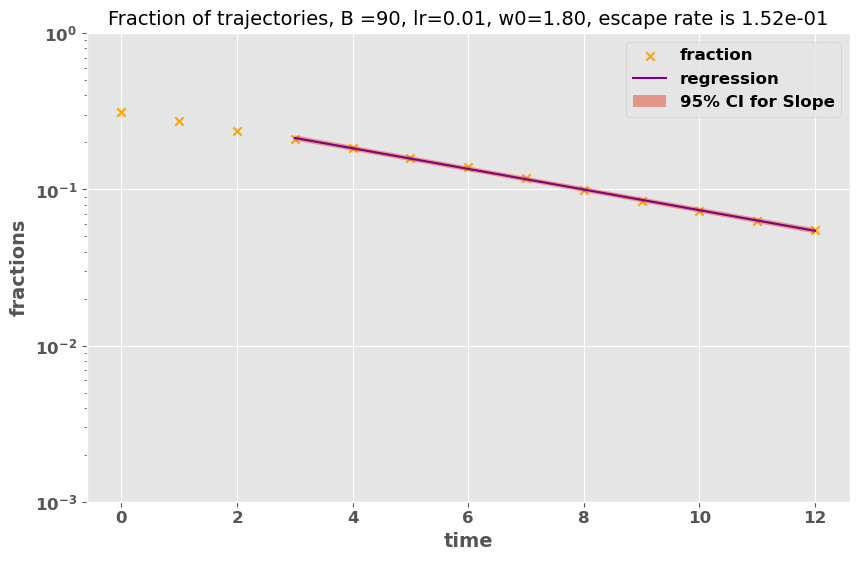

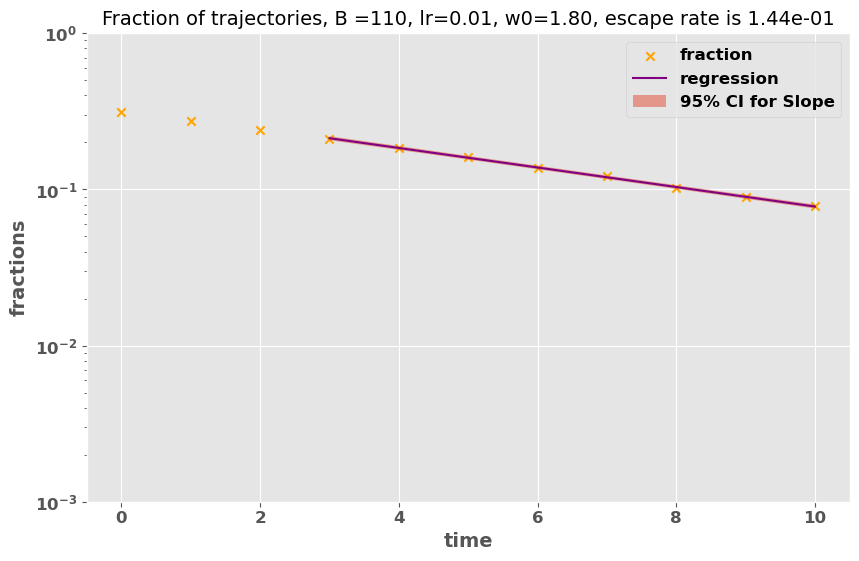

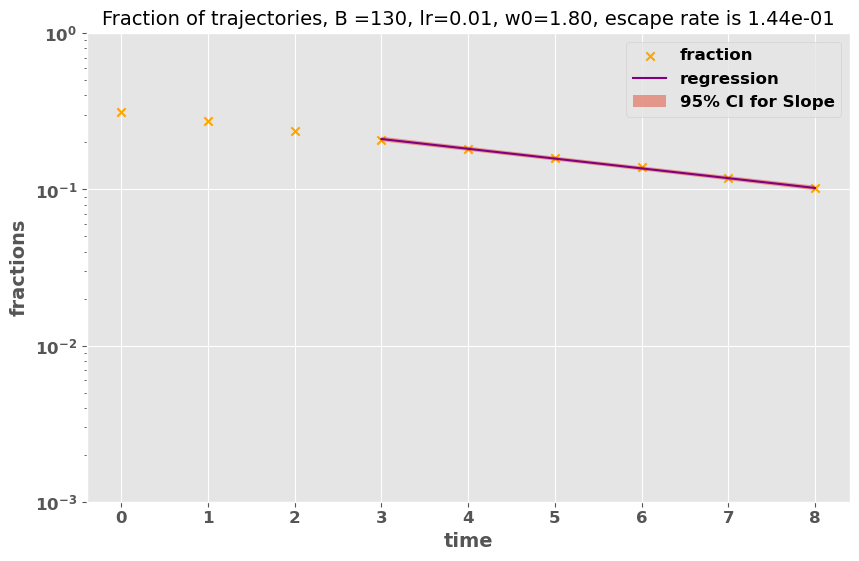

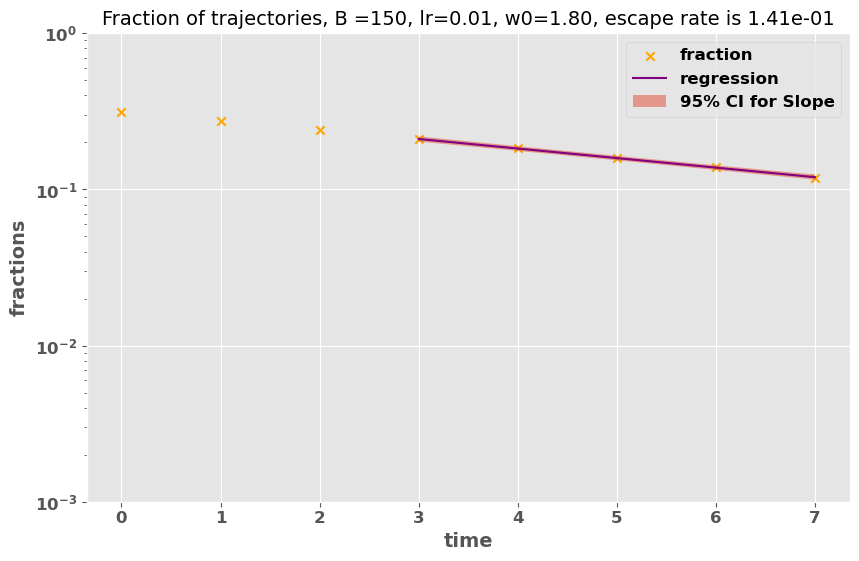

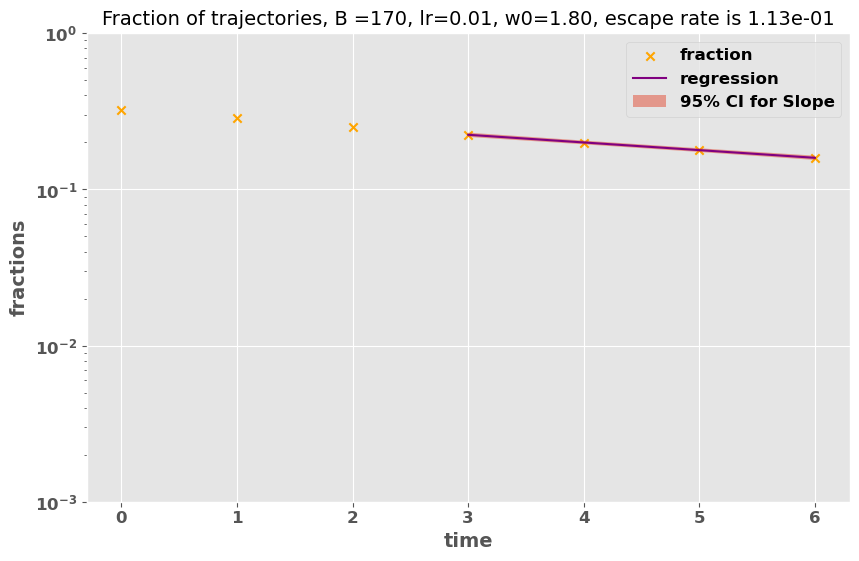

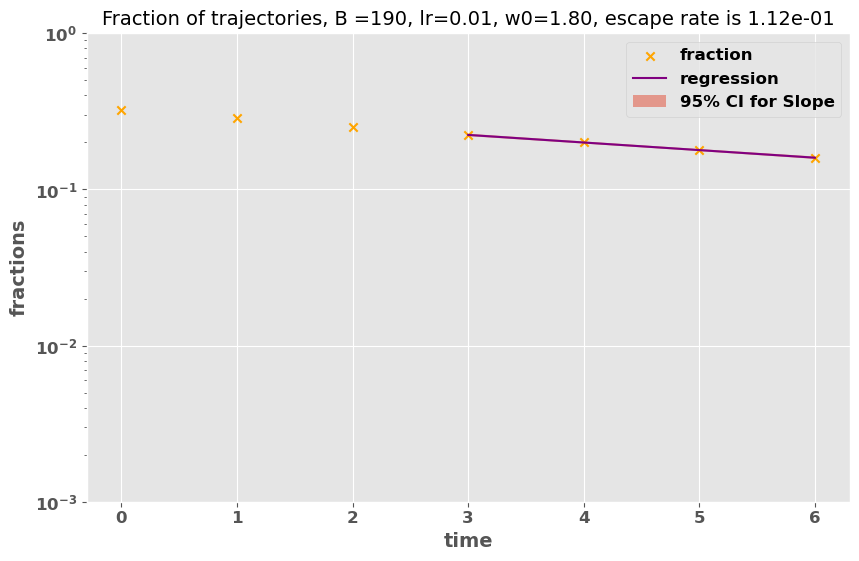

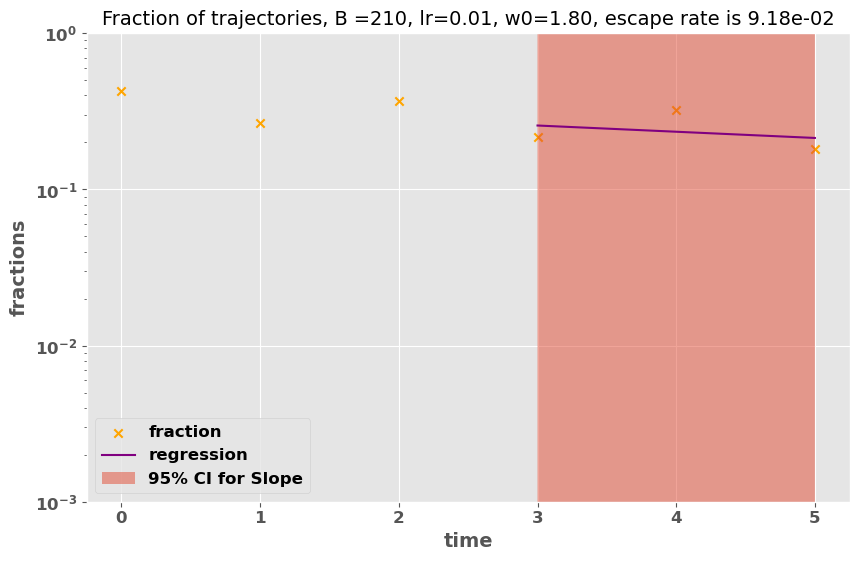

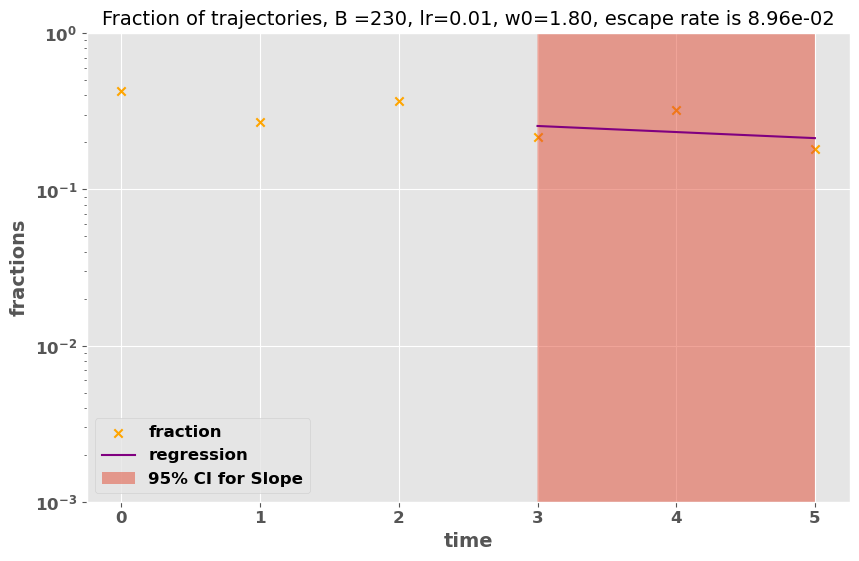

In [ ]:
# Initialise
nSGD = 10**4
nsamples = 10**3
shuffle = True
seed_init = 1
seed_data = 1
wmax = 4
frac_max = 10**-3
model = PolyModel(w0=w0, seed=seed_init, wmax=wmax, wmin=-wmax)
sgd_runner = SGDPolyRunner(nSGD=nSGD, nsamples=nsamples, seed=seed_data, shuffle=shuffle, 
                           batch_size=batch_size, auto=True)
# Run parameter sweep
w0_range = [1.8]
batch_range = np.arange(10, 250, 20)
lr_range = [0.01]
df = sgd_runner.parameter_sweep(w0_range, batch_range, lr_range, 
                        model, frac_max=frac_max)

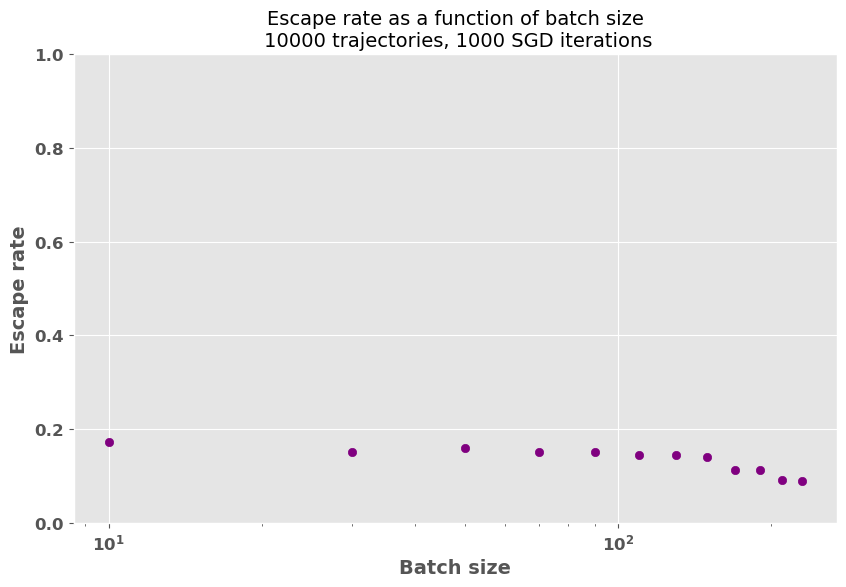

In [ ]:
%matplotlib inline
from scipy.interpolate import griddata
import matplotlib
cleaned_df = df.copy().dropna()
x = cleaned_df['B']
y = cleaned_df['escape_rate']
nexp = len(cleaned_df)
# Create the scatter plot
plt.scatter(x, y, c="purple")
# Adding a colorbar to show the values of escape_rate
# Adding labels and title
plt.xlabel('Batch size')
plt.ylabel('Escape rate')
plt.yscale('linear')
plt.xscale('log')
plt.title(f'Escape rate as a function of batch size\n {nSGD} trajectories, {nsamples/batch_size} SGD iterations')
plt.ylim(0, 1)
plt.show()